# Maximum A Posteriori Estimation (MAP)

Outline:
1. Quick recap for Bayes' Theorem. Needed to understand MAP
2. MAP for Bernoulli dist with an empirical example
3. MAP for Normal dist
4. Proving Normal's conjugate prior is Normal
5. Empirical example for (3)

Summary:
- MLE: Maximize likelihood, MAP: Maximize likelihood * prior 
- MAP helps us smooth MLE using a prior distribution. When the sample is skewed, MAP drags the MLE estimate towards the prior, **preventing overfitting**
- MAP can give a posterior dist but the goal of the MAP is to get a point estimate
- As sample size → population size, MAP → MLE
- MAP is MLE when the prior is Uniform. Beta(1, 1) is Uniform
- Choosing a prior that forms a conjugate prior (Prior and posterior belong to same dist. family) makes an analytical solution to obtain MAP possible.   
    E.g. Using Beta as prior to Bernoulli forms a conjugate prior
- Conjugate prior for the Normal is Normal if the variance is known, and the mean is unknown
- Having **lots of data**, and **low variance in the prior** has a big influence on the posterior. The actual posterior is the balance of these two influences
- Choice of the prior parameters affect MAP's effectiveness (in terms of bias and variance) against MLE

Sources and additional reading:  
[Zhiya Zuo - MLE vs. MAP](https://zhiyzuo.github.io/MLE-vs-MAP/)  
[Jeremy Orloff & Jonathan Broom - Beta Distributions](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading14a.pdf)  
[Jeremy Orloff & Jonathan Broom - Conjugate priors: Beta and Normal](https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading15a.pdf)  
[Michael I. Jordan - Conjugate prior for the Normal is Normal when variance known and mean unknown](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture5.pdf)  
[Michael I. Jordan - The exponential family: Conjugate priors](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter9.pdf)

---

## Quick Bayes' Theorem Recap

**Bayes' Theorem:** `P(A | B) = P(B | A) * P(A) / P(B)`  
**Chain rule:** `P(A, B) = P(A | B) * P(B) = P(B | A) * P(A)`

**Posterior:** P(A | B)  
**Likelihood:** P(B | A)  
**Prior:** P(A)

Posterior is our updated belief after combining our prior belief with the data

**Marginal:** P(B). Called that way bcz it's a marginalization of the joint probability P(A, B) over variable A  
If A continuous, `P(B) = ſ over A: P(A, B) dA = ſ over A: P(B | A) * P(A) dA`  
If A discrete, `P(B) = sum(P(A, B) for all A) = sum(P(B | A) * P(A) for all A)`

---

## Conceptual Intro to MAP

**Goal:** Choose `θ* = argmaxθ P(θ | data) = argmaxθ P(data | θ) * P(θ)`  
In plain english: Choose θ that is most probable given observed data and prior belief  
Posterior: P(θ | data), Likelihood: P(data | θ), Prior: P(θ)  
**Notice we got rid of P(data), because it's independent of the parameter θ**

MAP changes the "belief" as the data comes in, asymptotically (as sample size → population size) looks like MLE.  
For small sample size, prior is important. Prior becomes insignificant with the growth in the sample size.  
Thus it becomes `θ* = argmaxθ P(θ | data) = argmaxθ P(data | θ)`

**If MAP's prior is Uniform, we get the MLE**

Remember, MLE chooses `θ* = argmaxθ P(data | θ)`. 

*Note: Argmax returns the parameter maximizing the expression*

MAP is more intuitive since we usually have a prior belief before seeing the data as well. Given a coin toss, a prior belief might be 0.50 probability of heads. The prior belief is updated with the data coming. If the coin is rigged, the  data will correct the prior belief.

Note that while **MAP can give us a whole posterior distribution for parameter θ, the goal of MAP is still to get a point estimate.**

---

## MAP for Bernoulli Distribution
**Story:** Tossing coins with fixed probabilities. X: 1 if Heads, 0 if Tails. X ~ Bern(p). Estimate p (of getting Heads).  
*Using θ interchangably with p in the text below*

Remember goal: Choose `θ* = argmaxθ P(θ | data) = argmaxθ P(data | θ) * P(θ)`  
Using log-likelihood: `θ* = argmaxθ ln(P(θ | data)) = argmaxθ ln(P(data | θ)) + ln(P(θ))`

Likelihood is Bernoulli: `P(data | θ) = product(θ^xi * (1 - θ)^(1 - xi) for all i)`  
Choosing Beta as Prior: `P(θ) = θ^(α - 1) * (1 - θ)^(β - 1) ~ Beta(α, β)`  
Then the Posterior follows Beta: `P(θ | data) ~ Beta(α + sum(xi), β + n - sum(xi))`

**Beta's α, β can be thought like "prior successes, prior failures"**

**Goal becomes:** `θ* = argmaxθ product(θ^xi * (1 - θ)^(1 - xi) for all i) * θ^(α - 1) * (1 - θ)^(β - 1) ~ Beta(α, β)`  
Using log-likelihood: `θ* = argmaxθ ln(θ) * (sum(xi) + α - 1) + ln(1 - θ) * (n - sum(xi) + β - 1)`

The objective function (goal) is analytically solvable. Taking the partial derivative wrt θ and setting it to 0 seals the deal.  
`θ* = (α + sum(xi) - 1) / (α + β + n - 2)`

**A little FAQ would help at this point:**

**Q:** Why choose a prior and why's the prior usually different from the dist. of the data?  
**A:** Because prior = "Belief before observing the data". We need to choose a prior belief to update it with the data. That's the difference of Bayesian approach from the Frequentist approach. An exception is the Normal, Normal's conjugate prior is Normal as well.  

**Q:** Why choose Beta as prior of Binomial?  
**A:** Beta forms a **conjugate prior** if chosen as prior of Binomial. Conjugate prior = Prior and posterior are from the same dist family. Such a property is useful because it makes an analytical solution possible.

**Q:** Why ignore the normalizing factor in Beta?  
**A:** The same reason for ignoring P(data). It does not have something that concerns θ.

**Q:** How does the hyperparameters α, β coming from the prior smoothen the posterior?  
**A:** Assume there are α successes and β failures before any data is given. In the case of a sample having all ones, MAP will drag the MLE estimate towards the prior, preventing overfitting.

### Showing conjugate prior of Bernoulli is Beta
See: [Michael I. Jordan - The exponential family: Conjugate priors](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/other-readings/chapter9.pdf)

### An empirical example with coin tosses

With the story above, assume the true θ = p = P(Heads) = 0.7. Use a Beta prior with α = 2, β = 2

Our posterior will be updated with each data point xi: `Beta(α + xi, β + 1 - xi)`   
Which is equal to `Beta(α + sum(xi), β + n - sum(xi))`

The code below is taken (and slightly changed) from Zhiya Zuo's blogpost which's also mentioned at the top of the page.  
The easiest-to-understand example I've seen so far.

In [1]:
import numpy as np

THETA = 0.7  # P(Heads)
ALPHA, BETA = 2, 2  # parameters of the prior (hyperparameters)
sample_size = 100
rng = np.random.RandomState(42)
data = rng.choice([0, 1], p=[1 - THETA, THETA], size=sample_size)

sample_mean = np.mean(data)

print(f"Data is generated. Sample P(Heads) = {round(sample_mean, 2)}")

Data is generated. Sample P(Heads) = 0.66


In [2]:
print("Estimating P(Heads) = 0.70 using MAP with different sample sizes:")
print("Prior belief = 0.50")

for num_elements in (10, 30, 60, 100):
    sample_p = np.mean(data[:num_elements])
    # `θ* = (α + sum(xi) - 1) / (α + β + n - 2)`
    map_est = (ALPHA + sum(data[:num_elements]) - 1) / (ALPHA + BETA + num_elements - 2)
    print(f"n = {num_elements}, MAP estimate = {map_est}, MLE estimate (Sample P(Heads)) = {sample_p}")

Estimating P(Heads) = 0.70 using MAP with different sample sizes:
Prior belief = 0.50
n = 10, MAP estimate = 0.6666666666666666, MLE estimate (Sample P(Heads)) = 0.7
n = 30, MAP estimate = 0.59375, MLE estimate (Sample P(Heads)) = 0.6
n = 60, MAP estimate = 0.6290322580645161, MLE estimate (Sample P(Heads)) = 0.6333333333333333
n = 100, MAP estimate = 0.6568627450980392, MLE estimate (Sample P(Heads)) = 0.66


In [3]:
# let's plot our estimates showing the posterior distributions
beta_params = {0: [ALPHA, BETA]}
for num_elements in (10, 30, 60, 100):
    alpha_post = ALPHA + sum(data[:num_elements])
    beta_post = BETA + num_elements - sum(data[:num_elements])
    beta_params[num_elements] = [alpha_post, beta_post]

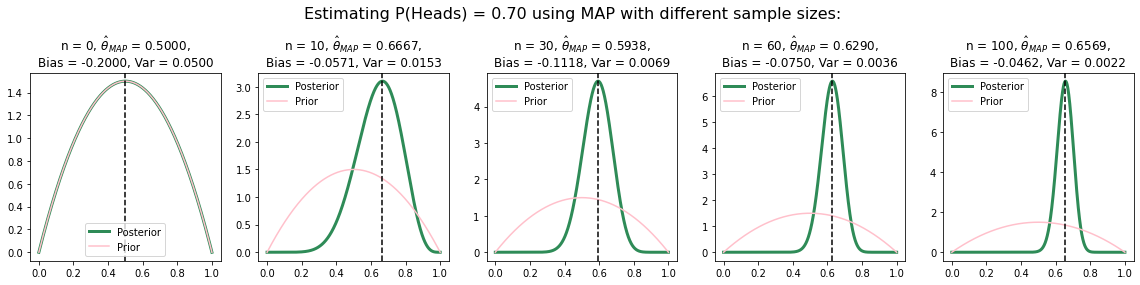

In [4]:
# observe how the posterior changes when we have more data
import matplotlib.pyplot as plt
from scipy.stats import beta

x_axis = np.linspace(0, 1, 1000)
some_green = "#2E8B57"
fig, ax_arr = plt.subplots(ncols=5, figsize=(16,4), sharex=True)
for i, num_elements in enumerate([0, 10, 30, 60, 100]):
    ax = ax_arr[i]
    a, b = beta_params[num_elements]
    beta_Y = beta.pdf(x=x_axis, a=a, b=b)
    prior_Y = beta.pdf(x=x_axis, a=ALPHA, b=BETA)
    ax.plot(x_axis, beta_Y, color=some_green, linewidth=3, label="Posterior")
    ax.plot(x_axis, prior_Y, color="pink", label="Prior")
    # calculating mode in beta dist
    if a > 1 and b > 1:
        mode = (a - 1)/(a + b - 2)
    else:
        mode = a /(a + b)
    # calculating bias and variance in beta dist
    mean = a / (a + b)
    bias = mean - THETA
    variance = a * b / (((a + b) ** 2) * (a + b + 1))
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title("n = %d, $\hat{\\theta}_{MAP}$ = %.4f,\nBias = %.4f, Var = %.4f"
                 % (num_elements, mode, bias, variance))
    ax.legend()
fig.tight_layout()
fig.suptitle("Estimating P(Heads) = 0.70 using MAP with different sample sizes:", size=16)
fig.subplots_adjust(top=0.75)
plt.show()

---

## MAP for Univariate Gaussian Mean

**Story:** We have a sample `x1 to xn` drawn from N(μ, σ2). Stdev known, mean unknown. Estimate μ  
Using θ interchangably with μ in the text below

Goal: `argmaxθ P(θ | data) = argmaxθ P(data | θ) * P(θ)`

Likelihood is Normal: `P(data | θ) = P(x1 to xn | θ) 
= product(1 / (sqrt(2 * π * σ^2))) * e^-((xi - μ)^2 / 2 * σ^2) for every i)`  
Choosing Normal as Prior: `P(θ) = 1 / (sqrt(2 * π * σ_pri^2))) * e^-((θ - μ_pri)^2 / 2 * σ^2)`  

We have a conjugate prior, so the MAP can be analytically found.  
`θ* = μ_pri * σ^2 / (n + σ^2) + sample_mean * n / (n + σ^2)`

The Posterior follows Normal: `P(θ | data) ~ N(μ_post, σ_post^2)`  
Where `μ_post = θ*` and `σ_post^2 = 1 / (1 / σ_pri^2 + n / σ^2)`

**Observe that having lots of data, and low variance in the prior has a big influence on the posterior. The actual posterior is a balance of these two influences**

**Q:** Why choose Normal as prior to Normal?  
**A:** If the likelihood function is Normal with **known variance**, Normal likelihood with Normal prior forms a Normal posterior.

### Showing conjugate prior of Normal is Normal if variance is known
Refer to: [Michael I. Jordan - Conjugate prior for the Normal is Normal when variance known and mean unknown](https://people.eecs.berkeley.edu/~jordan/courses/260-spring10/lectures/lecture5.pdf)

Likelihood: `P(data | μ, σ^2) ∝ (1 / σ^n) * e^(-1 / (2 * σ^2) * sum(xi - μ)^2)`  
Prior: `P(μ | μ_init, σ_init^2) ∝ (1 / σ_init) * e^(-1 / (2 * σ_init^2) * sum(xi - μ)^2)`  
In practice, when little is known about μ, it's common to set μ_init = 0 and σ_init^2 = some large value

**Lemma:** Assume (z1, z2) follow a bivariate Gaussian. Then z1 | z2 follows a Gaussian with parameters:  
`E(z1 | z2) = E(z1) + Cov(z1, z2) / Var(z2) * (z2 - E(z2)`  
`Var(z1 | z2) = Var(z1) - Cov^2(z1, z2) / Var(z2)`

**Applying Lemma with μ = z1, x = z2:**  
`E(x) = μ_init`  
`Var(x) = E(Var(x | μ)) + Var(E(x | μ)) = σ^2 + σ_init^2`  
`Cov(x, μ) = E(x - μ_init) * (μ - μ_init)`

Using the expressions above:  
`E(μ | x) = x * σ_init^2 / (σ^2 + σ_init^2) + μ_init * σ^2 / (σ^2 + σ_init^2)`  
`Var(μ | x) = 1 / (1 / σ_init^2 + 1 / σ^2) = (τ_prior + τ_data)^-1`  
where `τ  = 1 / σ^2` is the precision and `τ_post = τ_prior + τ_data`

**Posterior for a single measurement (n = 1) is Normal:**  
`μ | data ~ N(x * σ_init^2 / (σ^2 + σ_init^2) + μ_init * σ^2 / (σ^2 + σ_init^2), (1 / σ_init^2 + 1 / σ^2)^-1)`

**Posterior for multiple measurements is Normal:**  
`μ | data ~ N(x * σ_init^2 / (σ^2 / n + σ_init^2) + μ_init * σ^2 / (σ^2 / n + σ_init^2), (1 / σ_init^2 + n / σ^2)^-1)`

***These posteriors may look different than what we showed above due to different ways of simplifying the expressions.***

### An empirical example
Suppose we have prior θ ~ N(8, 9) (assume the scale parameter is variance), and likelihood x ~ N(θ, 5). We're provided with 1000 data points.   
Estimate mean θ. Also show the change in the posterior as we know more of the data.



In [5]:
THETA = 7  # True mean θ = μ
MU_PRIOR, VAR_PRIOR = 8, 9
VAR = 5
sample_size = 1000
rng = np.random.RandomState(42)
data = rng.normal(THETA, VAR ** 0.5, size=sample_size)

sample_mean, sample_var = np.mean(data), np.var(data)

print(f"Data is generated. Sample mean = {round(sample_mean, 2)},  sample var = {round(sample_var, 2)}")

Data is generated. Sample mean = 7.04,  sample var = 4.79


In [6]:
print("Estimating μ = 7 using MAP with different sample sizes:")
print("Prior belief = 8")

for num_elements in (100, 300, 600, 1000):
    sample_mean = np.mean(data[:num_elements])
    map_est = sample_mean * num_elements / (num_elements + VAR) + MU_PRIOR * VAR / (num_elements + VAR)
    print(f"n = {num_elements}, MAP estimate = {map_est}, MLE estimate (Sample mean) = {sample_mean}")

Estimating μ = 7 using MAP with different sample sizes:
Prior belief = 8
n = 100, MAP estimate = 6.82646869321923, MLE estimate (Sample mean) = 6.767792127880192
n = 300, MAP estimate = 7.004189880049677, MLE estimate (Sample mean) = 6.987593044717172
n = 600, MAP estimate = 6.978284288883945, MLE estimate (Sample mean) = 6.969769991291311
n = 1000, MAP estimate = 7.047987851705016, MLE estimate (Sample mean) = 7.043227790963542


In [7]:
# let's plot our estimates showing the posterior distributions
normal_params = {0: [MU_PRIOR, VAR_PRIOR]}
for num_elements in (100, 300, 600, 1000):
    sample_mean = np.mean(data[:num_elements])
    mu_post = sample_mean * num_elements / (num_elements + VAR) + MU_PRIOR * VAR / (num_elements + VAR)
    var_post = 1 / (1 / VAR_PRIOR + num_elements / VAR)
    normal_params[num_elements] = [mu_post, var_post]

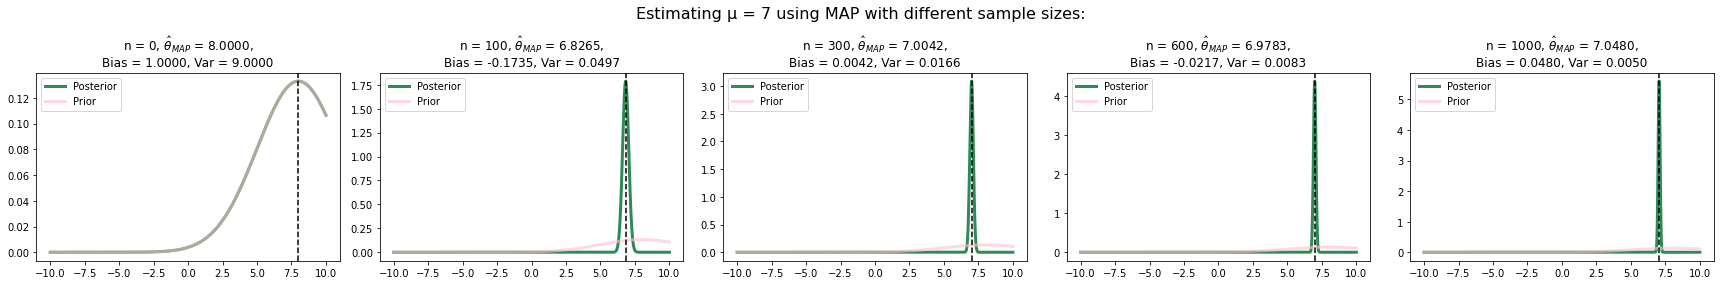

In [8]:
from scipy.stats import norm

x_axis = np.linspace(-10, 10, 1000)
some_green = "#2E8B57"
fig, ax_arr = plt.subplots(ncols=5, figsize=(24,4), sharex=True)
for i, num_elements in enumerate([0, 100, 300, 600, 1000]):
    ax = ax_arr[i]
    mu, var = normal_params[num_elements]
    normal_Y = norm.pdf(x=x_axis, loc=mu, scale=var ** 0.5)
    prior_Y = norm.pdf(x=x_axis, loc=MU_PRIOR, scale=VAR_PRIOR ** 0.5)
    ax.plot(x_axis, normal_Y, color=some_green, linewidth=3, label="Posterior")
    ax.plot(x_axis, prior_Y, color="pink", linewidth=3, alpha=0.6, label="Prior")
    # calculating bias and variance in normal dist
    mean = mu
    bias = mean - THETA
    variance = var
    ax.axvline(x=mean, linestyle='--', color='k')
    ax.set_title("n = %d, $\hat{\\theta}_{MAP}$ = %.4f,\nBias = %.4f, Var = %.4f"
                 % (num_elements, mean, bias, variance))
    ax.legend()
fig.tight_layout()
fig.suptitle("Estimating μ = 7 using MAP with different sample sizes:", size=16)
fig.subplots_adjust(top=0.75)
plt.show()